In [1]:
import numpy as np
import pandas as pd
df_MHQ = pd.read_csv('df_combined.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [1]:
df_MHQ = df_MHQ.rename(columns={'ID': 'eid'})
df_MHQ
df_MHQ.set_index('eid', inplace=True)
df_MHQ

In [2]:
# Filter out participants with severe psychiatric diseases
excluded_conditions = ['SRSchizophrenia', 'SRPsychosisAny', 'SRPersonalityDisorder', 'SRManiaBIP']

# Ensure columns exist in the dataframe
for condition in excluded_conditions:
    if condition not in df_MHQ.columns:
        raise ValueError(f"Column '{condition}' not found in the dataframe!")

# Exclude participants where any of the specified conditions are equal to 1
df_MHQ = df_MHQ[~((df_MHQ['SRSchizophrenia'] == 1) |
                   (df_MHQ['SRPsychosisAny'] == 1) |
                   (df_MHQ['SRPersonalityDisorder'] == 1) |
                   (df_MHQ['SRManiaBIP'] == 1))]

print(f"Excluded participants with {', '.join(excluded_conditions)} = 1.")
print(f"Remaining participants: {df_MHQ.shape[0]} rows")


In [3]:
# Define the columns you want to keep
columns = [
#PHQ-9
'Recent lack of interest or pleasure in doing things',
'Recent feelings of depression',
'Trouble falling or staying asleep, or sleeping too much',
'Recent feelings of tiredness or low energy',
'Recent poor appetite or overeating',
'Recent feelings of inadequacy',
'Recent trouble concentrating on things',
'Recent changes in speed/amount of moving or speaking',
'Recent thoughts of suicide or self-harm',



'Age.At.MHQ_x', 
'Gender_x',
'TDI.Tertiles',
'Frequency of drinking alcohol',
'Smoker_x',
'Moderate.Physical.Activity_x',
'Body mass index (BMI)', 
'C-reactive protein',

 
]

df_MHQ_selected = df_MHQ[columns]


df_MHQ_selected.rename(columns={
    # Variables with specific renames
    'Recent lack of interest or pleasure in doing things': 'Anhedonia',
    'Recent feelings of depression': 'Depressed mood',
    'Trouble falling or staying asleep, or sleeping too much': 'Sleep problems',
    'Recent feelings of tiredness or low energy': 'Fatigue',
    'Recent poor appetite or overeating': 'Appetite changes',
    'Recent feelings of inadequacy': 'Feelings of inadequacy',
    'Recent trouble concentrating on things': 'Cognitive problems',
    'Recent changes in speed/amount of moving or speaking': 'Psychomotor changes',
    'Recent thoughts of suicide or self-harm': 'Suicidal ideation',
    'Age.At.MHQ_x': 'Age',
    'Gender_x': 'Gender',
    'TDI.Tertiles': 'TDI',
    'Frequency of drinking alcohol': 'Alcohol',
    'Smoker_x': 'Smoker',
    'Moderate.Physical.Activity_x': 'Physical activity',
    'Depressed.Ever': 'Depressed ever',
    'Depressed.Current': 'Depressed current',
    'Body mass index (BMI)': 'BMI',
    'C-reactive protein': 'CRP', 
}, inplace=True)



In [4]:
imputed_nmr = pd.read_csv('imputed_nmr.csv')

In [6]:
imputed_nmr.set_index('eid', inplace=True)

In [5]:
df_merged = pd.merge(df_MHQ_selected, imputed_nmr, on='eid', how='inner')

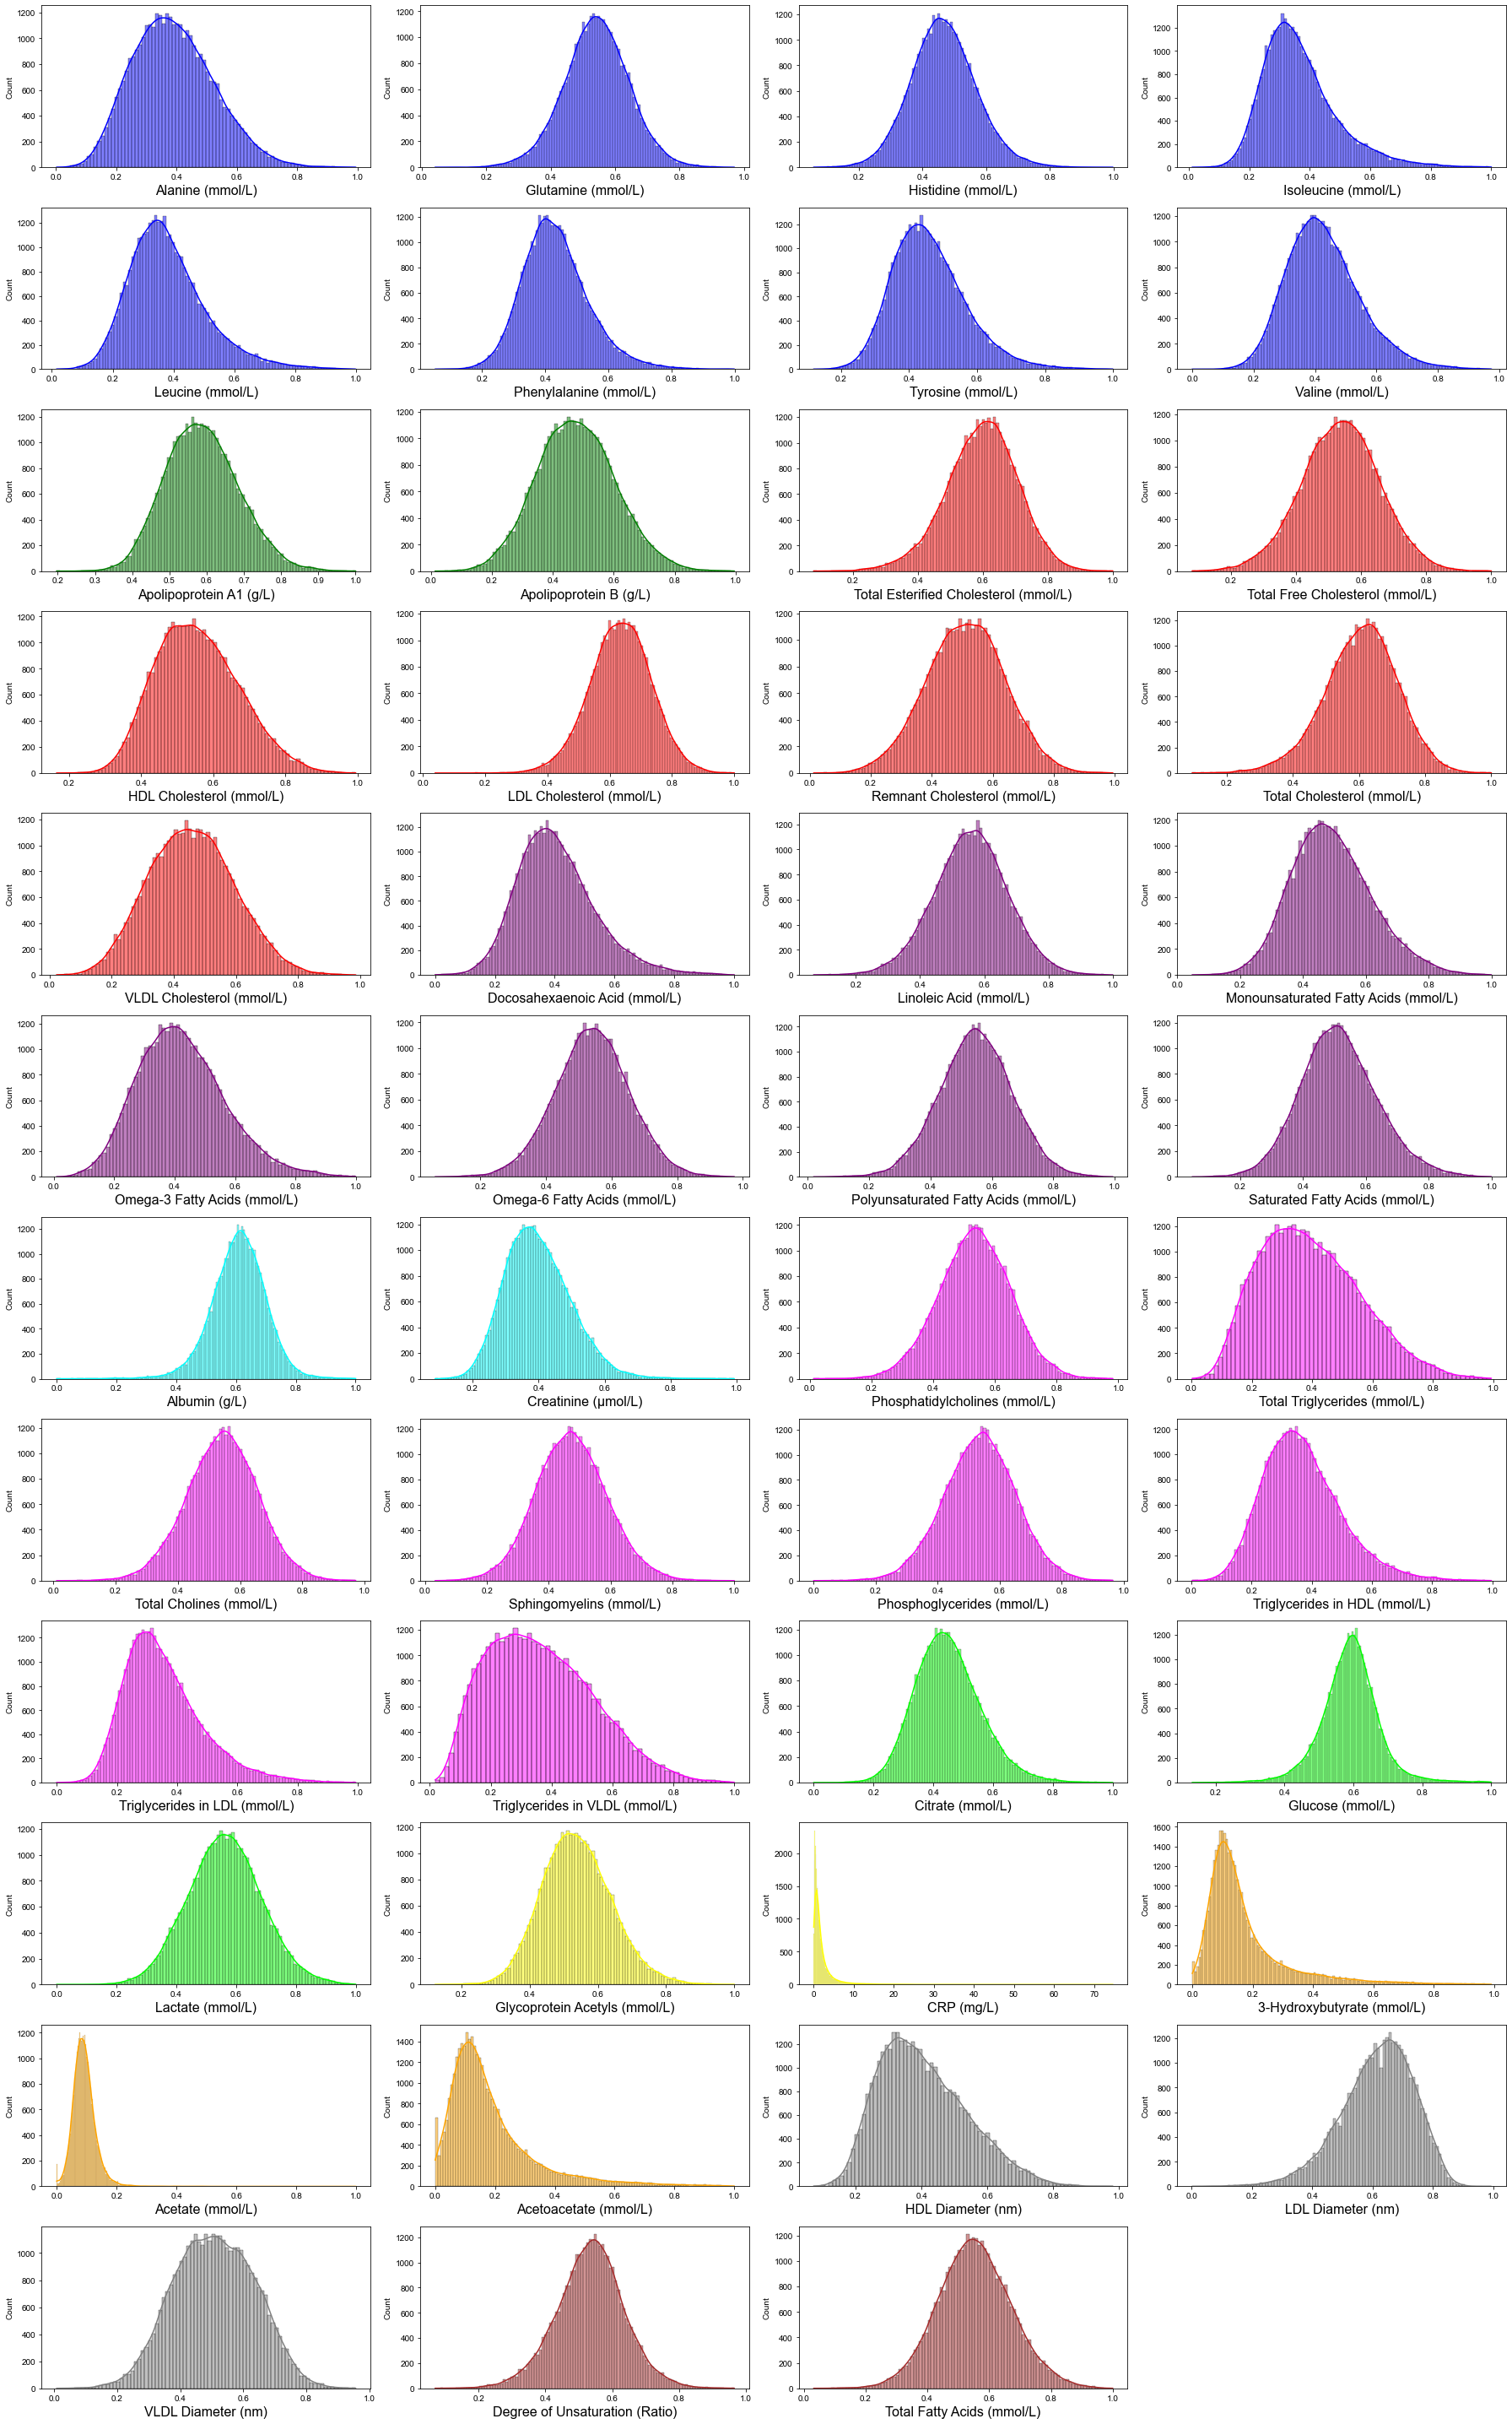

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set the global font to use Arial where possible
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Sample DataFrame 'imputed_nmr' with your data needs to be loaded

# Dictionary mapping groups to their metabolites
group_metabolites = {
    'Amino acids': ['Alanine', 'Glutamine', 'Histidine', 'Isoleucine', 'Leucine',
                    'Phenylalanine', 'Tyrosine', 'Valine'],
    'Apolipoproteins': ['Apolipoprotein A1', 'Apolipoprotein B'],
    'Cholesterol': ['Total Esterified Cholesterol', 'Total Free Cholesterol', 'HDL Cholesterol',
                    'LDL Cholesterol', 'Remnant Cholesterol (Non-HDL, Non-LDL -Cholesterol)', 'Total Cholesterol', 'VLDL Cholesterol'],
    'Fatty acids': ['Docosahexaenoic Acid', 'Linoleic Acid', 'Monounsaturated Fatty Acids',
                    'Omega-3 Fatty Acids', 'Omega-6 Fatty Acids', 'Polyunsaturated Fatty Acids',
                    'Saturated Fatty Acids'],
    'Fluid balance': ['Albumin', 'Creatinine'],
    'Glycerides and phospholipids': ['Phosphatidylcholines', 'Total Triglycerides', 'Total Cholines',
                                     'Sphingomyelins', 'Phosphoglycerides', 'Triglycerides in HDL',
                                     'Triglycerides in LDL', 'Triglycerides in VLDL'],
    'Glycolysis related metabolites': ['Citrate', 'Glucose', 'Lactate'],
    'Inflammation': ['Glycoprotein Acetyls', 'CRP'],
    'Ketone bodies': ['3-Hydroxybutyrate', 'Acetate', 'Acetoacetate'],
    'Lipoprotein particle size': ['Average Diameter for HDL Particles', 'Average Diameter for LDL Particles',
                                  'Average Diameter for VLDL Particles'],
    'Total fatty acids and saturation measures': ['Degree of Unsaturation', 'Total Fatty Acids']
}

# Colors for each group
colors = {
    'Amino acids': 'blue',
    'Apolipoproteins': 'green',
    'Cholesterol': 'red',
    'Fatty acids': 'purple',
    'Fluid balance': 'cyan',
    'Glycerides and phospholipids': 'magenta',
    'Glycolysis related metabolites': 'lime',
    'Inflammation': 'yellow',
    'Ketone bodies': 'orange',
    'Lipoprotein particle size': 'grey',
    'Total fatty acids and saturation measures': 'brown'
}

# Flatten the list of all metabolites for filtering
flat_metabolites = [met for sublist in group_metabolites.values() for met in sublist]

# Filter the DataFrame
metabolites_data = df_merged[flat_metabolites]

# Create a grid of subplots
fig, axes = plt.subplots(12, 4, figsize=(25, 40))  # Adjust rows and columns if necessary
axes = axes.flatten()
# Dictionary mapping metabolites to their display names with units
units_dict = {
    'Alanine': 'Alanine (mmol/L)',
    'Glutamine': 'Glutamine (mmol/L)',
    'Histidine': 'Histidine (mmol/L)',
    'Isoleucine': 'Isoleucine (mmol/L)',
    'Leucine': 'Leucine (mmol/L)',
    'Phenylalanine': 'Phenylalanine (mmol/L)',
    'Tyrosine': 'Tyrosine (mmol/L)',
    'Valine': 'Valine (mmol/L)',
    'Apolipoprotein A1': 'Apolipoprotein A1 (g/L)',
    'Apolipoprotein B': 'Apolipoprotein B (g/L)',
    'Total Esterified Cholesterol': 'Total Esterified Cholesterol (mmol/L)',
    'Total Free Cholesterol': 'Total Free Cholesterol (mmol/L)',
    'HDL Cholesterol': 'HDL Cholesterol (mmol/L)',
    'LDL Cholesterol': 'LDL Cholesterol (mmol/L)',
    'Remnant Cholesterol (Non-HDL, Non-LDL -Cholesterol)': 'Remnant Cholesterol (mmol/L)',
    'Total Cholesterol': 'Total Cholesterol (mmol/L)',
    'VLDL Cholesterol': 'VLDL Cholesterol (mmol/L)',
    'Docosahexaenoic Acid': 'Docosahexaenoic Acid (mmol/L)',
    'Linoleic Acid': 'Linoleic Acid (mmol/L)',
    'Monounsaturated Fatty Acids': 'Monounsaturated Fatty Acids (mmol/L)',
    'Omega-3 Fatty Acids': 'Omega-3 Fatty Acids (mmol/L)',
    'Omega-6 Fatty Acids': 'Omega-6 Fatty Acids (mmol/L)',
    'Polyunsaturated Fatty Acids': 'Polyunsaturated Fatty Acids (mmol/L)',
    'Saturated Fatty Acids': 'Saturated Fatty Acids (mmol/L)',
    'Albumin': 'Albumin (g/L)',
    'Creatinine': 'Creatinine (µmol/L)',
    'Phosphatidylcholines': 'Phosphatidylcholines (mmol/L)',
    'Total Triglycerides': 'Total Triglycerides (mmol/L)',
    'Total Cholines': 'Total Cholines (mmol/L)',
    'Sphingomyelins': 'Sphingomyelins (mmol/L)',
    'Phosphoglycerides': 'Phosphoglycerides (mmol/L)',
    'Triglycerides in HDL': 'Triglycerides in HDL (mmol/L)',
    'Triglycerides in LDL': 'Triglycerides in LDL (mmol/L)',
    'Triglycerides in VLDL': 'Triglycerides in VLDL (mmol/L)',
    'Citrate': 'Citrate (mmol/L)',
    'Glucose': 'Glucose (mmol/L)',
    'Lactate': 'Lactate (mmol/L)',
    'Glycoprotein Acetyls': 'Glycoprotein Acetyls (mmol/L)',
    '3-Hydroxybutyrate': '3-Hydroxybutyrate (mmol/L)',
    'Acetate': 'Acetate (mmol/L)',
    'Acetoacetate': 'Acetoacetate (mmol/L)',
    'Average Diameter for HDL Particles': 'HDL Diameter (nm)',
    'Average Diameter for LDL Particles': 'LDL Diameter (nm)',
    'Average Diameter for VLDL Particles': 'VLDL Diameter (nm)',
    'Degree of Unsaturation': 'Degree of Unsaturation (Ratio)',
    'Total Fatty Acids': 'Total Fatty Acids (mmol/L)',
    'CRP': 'CRP (mg/L)'
}

# Modify the plotting loop to use these formatted names
for i, met in enumerate(flat_metabolites):
    for group, met_list in group_metabolites.items():
        if met in met_list:
            color = colors[group]
            sns.histplot(metabolites_data[met], kde=True, ax=axes[i], color=color)
            
            # Use the formatted name with units from the dictionary
            axes[i].set_xlabel(units_dict.get(met, met), fontsize=16)  # Fallback to original name if not found
            
            # Adjust appearance
            axes[i].set_title('')
            #axes[i].xaxis.set_label_coords(0.5, -0.25)
           # axes[i].tick_params(axis='x', rotation=45, labelsize=10)
          #  axes[i].set_ylabel('Count', fontsize=10)

# Final adjustments
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("metabolite_distributions_with_units.tiff", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
missing_values_sum = df_merged.isna().sum()

# Calculate the total number of rows in the dataframe
total_rows = df_merged.shape[0]

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_sum / total_rows) * 100
print(missing_values_percentage)


# Define mapping for TDI.Tertiles
tdi_mapping = {
    'Average': 0,
    'Most': 1,
    'Least': 2,
    np.nan: np.nan  
}
df_merged['TDI'] = df_merged['TDI'].replace(tdi_mapping)

# Define mapping for Smoker_x
smoker_mapping = {
    'Never': 0,
    'Former': 1,
    'Current': 2,
    'PreferNotToAnswer': -818
}
df_merged['Smoker'] = df_merged['Smoker'].replace(smoker_mapping)



# Loop through each column in the DataFrame
for column in df_merged.columns:
    print(f"\nUnique values for '{column}':")
    
    # Calculate value counts for the column
    value_counts = df_merged[column].value_counts()
    
    # Create a DataFrame with counts (and retain the additional 'count' column)
    value_counts_df = value_counts.reset_index().rename(
        columns={'index': 'Unique Value', column: 'Count'}
    )
    
    # Assume there's an additional 'count' column in value_counts_df
    if 'count' in value_counts_df.columns:
        total_count = value_counts_df['count'].sum()  # Total from the 'count' column
        # Calculate percentage using the 'count' column
        value_counts_df['Percentage'] = (value_counts_df['count'] / total_count) * 100
    else:
        total_count = value_counts_df['Count'].sum()  # Fallback to 'Count' if no 'count' column exists
        value_counts_df['Percentage'] = (value_counts_df['Count'] / total_count) * 100
    
    # Format the percentage as a string with two decimal places and a % sign
    value_counts_df['Percentage'] = value_counts_df['Percentage'].map("{:.2f}%".format)
    
    # Display the DataFrame
    display(value_counts_df)
    
    


# Assuming your DataFrame is named df_MHQ_selected and has a column "Age"
# Calculate the mean and standard deviation for the "Age" column
age_mean = df_merged['BMI'].mean()
age_std = df_merged['BMI'].std()

# Print the results
print(f"Mean of Age: {age_mean}")
print(f"Standard Deviation of Age: {age_std}")

In [13]:
df_merged.replace(-818, np.nan, inplace=True)

missing_values_sum = df_merged.isna().sum()

# Calculate the total number of rows in the dataframe
total_rows = df_merged.shape[0]

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_sum / total_rows) * 100
missing_values_percentage.head(50)


#IMPUTE 

Anhedonia                                              0.282826
Depressed mood                                         0.372434
Sleep problems                                         0.263224
Fatigue                                                0.246423
Appetite changes                                       0.168015
Feelings of inadequacy                                 0.534849
Cognitive problems                                     0.140013
Psychomotor changes                                    0.221220
Suicidal ideation                                      0.742068
Age                                                    0.000000
Gender                                                 0.000000
TDI                                                    0.140013
Alcohol                                                0.159615
Smoker                                                 0.252023
Physical activity                                      2.761054
BMI                                     

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
import pandas as pd



# Define the columns
continuous_columns = [ 'BMI', 'CRP' ]
categorical_columns = [col for col in df_merged.columns if col not in continuous_columns]

# Initialize the IterativeImputer for continuous columns
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df_merged[continuous_columns] = iterative_imputer.fit_transform(df_merged[continuous_columns])

# Initialize the SimpleImputer for categorical columns
simple_imputer = SimpleImputer(strategy='most_frequent')  # common strategy for categorical data
df_merged[categorical_columns] = simple_imputer.fit_transform(df_merged[categorical_columns])

# Check for any remaining missing values
print(df_merged.isna().sum().tolist())


/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/angelakoloi/anaconda3/envs/python10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [20]:

def calculate_phq9_score(row):
    phq9_items = ['Anhedonia', 'Depressed mood', 'Sleep problems', 'Fatigue', 
                  'Appetite changes', 'Feelings of inadequacy', 'Cognitive problems', 
                  'Psychomotor changes', 'Suicidal ideation']
    
    total_score = sum(row[item] for item in phq9_items)
    
    if total_score <= 4:
        interpretation = 0  # "None-minimal depression"
    elif 5 <= total_score <= 9:
        interpretation = 1  # "Mild depression"
    elif 10 <= total_score <= 14:
        interpretation = 2  # "Moderate depression"
    elif 15 <= total_score <= 19:
        interpretation = 3  # "Moderately severe depression"
    else:
        interpretation = 4  # "Severe depression"
    
    return pd.Series({'PHQ9_Score': total_score, 'Depression_Level': interpretation})

# Apply the function to each row of the dataframe
df_merged[['PHQ9_Score', 'Depression_Level']] = df_merged.apply(calculate_phq9_score, axis=1)

# Display the results
print(df_merged[['PHQ9_Score', 'Depression_Level']])

# If you want to add a column with the text interpretation, you can use this:
# depression_levels = {0: "None-minimal depression", 1: "Mild depression", 
#                      2: "Moderate depression", 3: "Moderately severe depression", 
#                      4: "Severe depression"}
# df_MHQ_selected['Depression_Level_Text'] = df_MHQ_selected['Depression_Level'].map(depression_levels)

# # Display the results including the text interpretation
# print(stratified_df[['PHQ9_Score', 'Depression_Level', 'Depression_Level_Text']])


mean_phq9 = df_merged["PHQ9_Score"].mean()
std_phq9 = df_merged["PHQ9_Score"].std()

print(f"Mean PHQ-9 Score: {mean_phq9:.2f}")
print(f"Standard Deviation: {std_phq9:.2f}")

         PHQ9_Score  Depression_Level
eid                                  
1000123         9.0               1.0
1000219        14.0               2.0
1000468         9.0               1.0
1000596         9.0               1.0
1000789        10.0               2.0
...             ...               ...
6024085        27.0               4.0
6024295         9.0               1.0
6024580        14.0               2.0
6024694        14.0               2.0
6024798        10.0               2.0

[35711 rows x 2 columns]
Mean PHQ-9 Score: 11.75
Standard Deviation: 3.64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Ensure metabolites_data is a list of valid metabolite columns
metabolites_data = [
   'hs-CRP (mg/L)', 'IL-6 (pg/mL)', 'TNF-α (pg/mL)',
   'Glycoprotein acetyls (mmol/L)', 'Apolipoprotein A1 (g/L)',
   'Apolipoprotein B (g/L)', 'Remnant cholesterol (mmol/L)',
   'VLDL cholesterol (mmol/L)', 'HDL cholesterol (mmol/L)',
   'HDL-2 cholesterol (mmol/L)', 'HDL-3 cholesterol (mmol/L)',
   'VLDL diameter (nm)', 'HDL diameter (nm)', 'Diacylglycerol (mmol/L)',
   'Serum triglycerides (mmol/L)', 'VLDL triglycerides (mmol/L)',
   'LDL triglycerides (mmol/L)', 'HDL triglycerides (mmol/L)',
   'Monounsaturated FAs (mmol/L)', 'Total FAs (mmol/L)',
   'FA chain length (estimated)', 'Acetate (mmol/L)', 'Tyrosine (mmol/L)',
   'Isoleucine (mmol/L)'
]

# Remove extreme IL-6 values (>700 pg/mL)
cleaned_data = df_merged[df_merged['IL-6 (pg/mL)'] <= 500]

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
metabolites_data_df = df_merged[metabolites_data]  # Subset metabolites from the cleaned data
metabolites_data_df['outlier'] = iso_forest.fit_predict(metabolites_data_df)

plt.figure(figsize=(20, 10))  # Adjust width and height as needed

# Create the boxplot, dropping the 'outlier' column if it exists
sns.boxplot(data=metabolites_data_df.drop(columns=['outlier'], errors='ignore'))

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=14)  # Adjust fontsize as needed
plt.yticks(fontsize=14)  # Increase y-axis font size

# Add y-axis title
plt.ylabel('Concentration', fontsize=16)  # Customize title and fontsize as needed

plt.tight_layout()
# Save the plot as a high-resolution PNG image
output_path = "boxplot_outliers_high_res.png"  # Specify the file name
plt.savefig(output_path, dpi=600)  # Save with 600 DPI resolution
plt.show()

In [ ]:
# Identify numeric columns only
numeric_columns = metabolites_data.select_dtypes(include=np.number).columns

# Initialize an empty list to store columns with significant outliers
columns_with_outliers = []

# Loop through each numeric column to check for significant outliers
for col in numeric_columns:
    if col != 'outlier':  # Skip the 'outlier' column
        # Calculate the proportion of outliers in the column
        proportion_outliers = len(metabolites_data[col].dropna()) / len(metabolites_data[col])
        # Consider the column to have significant outliers if > 5% are outliers
        if proportion_outliers > 0.05:  # Adjust threshold as needed
            columns_with_outliers.append(col)

# Plot only the columns with significant outliers
if columns_with_outliers:
    plt.figure(figsize=(20, 10))  # Adjust figure size as needed
    sns.boxplot(data=metabolites_data[columns_with_outliers])
    plt.xticks(rotation=90, fontsize=14)  # Adjust font size and rotation
    plt.yticks(fontsize=14)  # Adjust y-axis font size
    plt.tight_layout()  # Apply tight layout for better spacing
    plt.savefig("outliers_boxplot.tiff", dpi=1200)  # Save the figure with high resolution
    plt.show()
else:
    print("No columns with significant outliers found.")


In [8]:
CVD = pd.read_csv('angela_24feb2025_essentials.csv')
CVD.set_index('eid', inplace=True)
CVD

df_merged = pd.merge(df_merged_no_outliers, CVD, on='eid')

In [9]:
columns_to_drop = [
    
    'birth_date',
 'date_v1',
 'date_mhq',
 'death.date',
 'is.dead',
 'date_earliest_cad',
 'date_earliest_icd10',
 'date_earliest_sec_icd10',
 'date_earliest_ath_icd10',
 'date_earliest_ath_sec_icd10',
 'date_earliest_ht_icd10',
 'date_earliest_ht_sec_icd10',
 'death_by_cvd',
 'death_with_ath',
 'death_with_ht',
 'had_cvd_at_baseline',
 'had_cvd_at_mhq',
 'had_cvd_after_mhq',
 'had_ath_at_baseline',
 'had_ath_after_mhq',
 'had_ht_at_baseline',
 'had_ht_at_mhq',
 'had_ht_after_mhq',
 'high_bp_baseline',
 'high_bp_mhq',
 'high_bp_after_mhq',
 'med_ht_baseline',
 'med_ht_mhq',
 'med_ht_after_mhq',
 'systolic_BP_v1',
 'diastolic_BP_v1',
 'systolic_BP_v2',
 'diastolic_BP_v2',
 'systolic_BP_v3',
 'diastolic_BP_v3',
 'systolic_BP_v4',
 'diastolic_BP_v4',
 'medication_BP_v1',
 'medication_BP_v2',
 'medication_BP_v3',
 'medication_BP_v4',
 'father_heart_disease',
 'mother_heart_disease',
 'siblings_heart_disease'
  
]

df_merged.drop(columns=columns_to_drop, inplace=True, errors='ignore')

missing_values_sum = df_merged.isna().sum()

# Calculate the total number of rows in the dataframe
total_rows = df_merged.shape[0]

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_sum / total_rows) * 100
print(missing_values_percentage)


# Define mapping for TDI.Tertiles
tdi_mapping = {
    'Average': 0,
    'Most': 1,
    'Least': 2,
    np.nan: np.nan  
}
df_merged['TDI'] = df_merged['TDI'].replace(tdi_mapping)

# Define mapping for Smoker_x
smoker_mapping = {
    'Never': 0,
    'Former': 1,
    'Current': 2,
    'PreferNotToAnswer': -818
}
df_merged['Smoker'] = df_merged['Smoker'].replace(smoker_mapping)



# Loop through each column in the DataFrame
for column in df_merged.columns:
    print(f"\nUnique values for '{column}':")
    
    # Calculate value counts for the column
    value_counts = df_merged[column].value_counts()
    
    # Create a DataFrame with counts (and retain the additional 'count' column)
    value_counts_df = value_counts.reset_index().rename(
        columns={'index': 'Unique Value', column: 'Count'}
    )
    
    # Assume there's an additional 'count' column in value_counts_df
    if 'count' in value_counts_df.columns:
        total_count = value_counts_df['count'].sum()  # Total from the 'count' column
        # Calculate percentage using the 'count' column
        value_counts_df['Percentage'] = (value_counts_df['count'] / total_count) * 100
    else:
        total_count = value_counts_df['Count'].sum()  # Fallback to 'Count' if no 'count' column exists
        value_counts_df['Percentage'] = (value_counts_df['Count'] / total_count) * 100
    
    # Format the percentage as a string with two decimal places and a % sign
    value_counts_df['Percentage'] = value_counts_df['Percentage'].map("{:.2f}%".format)
    
    # Display the DataFrame
    display(value_counts_df)
    
    


# Assuming your DataFrame is named df_MHQ_selected and has a column "Age"
# Calculate the mean and standard deviation for the "Age" column
age_mean = df_merged['BMI'].mean()
age_std = df_merged['BMI'].std()

# Print the results
print(f"Mean of Age: {age_mean}")
print(f"Standard Deviation of Age: {age_std}")

In [64]:
df_merged.to_csv('df_merged_networkanalysis.csv', index=True)

Number of participants before: 33925
Number of participants with ATH before MHQ: 1175
Number of participants with ATH at MHQ: 2131
Number of participants with ATH 6 years after the MHQ: 1569


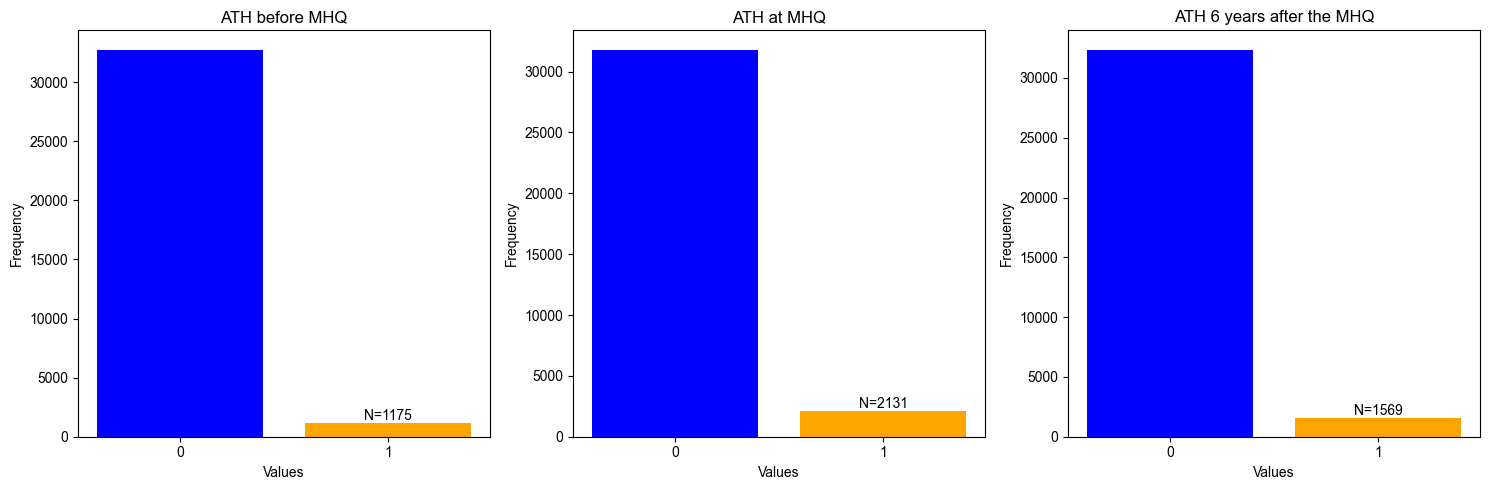

In [70]:

print("Number of participants before:", df_merged.shape[0])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Titles for plots
titles = ['ATH before MHQ', 'ATH at MHQ', 'ATH 6 years after the MHQ']
columns = ['had_ath_at_baseline', 'had_ath_at_mhq', 'had_ath_after_mhq']

# Plotting loop
for i, column in enumerate(columns):
    # Count the frequency of each value
    value_counts = df_merged[column].value_counts()
    
    # Ensure both 0 and 1 are present in the results
    value_counts = value_counts.reindex([0, 1], fill_value=0)
    
    # Create bar plot
    axes[i].bar(value_counts.index, value_counts.values, color=['blue', 'orange'])
    axes[i].set_title(titles[i])
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

    # Annotate the count of '1' values directly on the plot
    count_of_ones = value_counts.get(1, 0)  # Get count of 1's or 0 if absent
    axes[i].text(1, count_of_ones, f'N={count_of_ones}', ha='center', va='bottom')
    
    # Print the number of participants with CVD
    print(f"Number of participants with {titles[i]}: {count_of_ones}")

# Show the plot
plt.tight_layout()
plt.show()

